In [1]:
# Import the SOME/IP entities.
from timing.entities import *
# Import the timing analysis functions.
import timing.timing_analysis as analysis
# Import the plot functions.
from plot.client_service_plot import *
from plot.support import *

In [2]:
import logging
# Set the logging level.
analysis.set_logger_level(logging.DEBUG)

In [3]:
# Service and client configuration.
s = Service("Service", boot_del=2, init_del=4, rep_del=1, rep_max=3, cyc_del=2, ans_del=1, offer_mode=True)
c = Client("Client", boot_del=3, init_del=2, rep_del=1, rep_max=3, find_mode=False)
# List of entities.
entities = [c, s]
# Communication delay.
t_c = 2

In [4]:
# Adjust the phases.
adjust_phases(entities)

In [5]:
# The actual start-up delay.
t_w = analysis.timing_analysis(s, c, t_c)

[15:12:26][timing        ][DEBUG   ] (a) Service in Offer Mode and Client in Listen Mode
[15:12:26][timing        ][DEBUG   ] compute_z_c(c.boot_del: 3.00, s.t_init: 6.00) -> 0.00
[15:12:26][timing        ][DEBUG   ] compute_x_c(z_c: 0.00, t_c: 2.00, s.rep_del: 1.00) -> 0
[15:12:26][timing        ][DEBUG   ] compute_x_c_hat(s.rep_max: 3, x_c: 0) -> 0
[15:12:26][timing        ][DEBUG   ] compute_t_rep(e.rep_del: 1.00, x: 0) -> 0.00
[15:12:26][timing        ][DEBUG   ] compute_z_c(c.boot_del: 3.00, s.t_init: 6.00) -> 0.00
[15:12:26][timing        ][DEBUG   ] compute_t_rep(e.rep_del: 1.00, x: 3) -> 7.00
[15:12:26][timing        ][DEBUG   ] compute_y(z_c: 0.00, t_c: 2.00, t_rep: 7.00, s.cyc_del: 2.00) -> -4
[15:12:26][timing        ][DEBUG   ] compute_z_c(c.boot_del: 3.00, s.t_init: 6.00) -> 0.00
[15:12:26][timing        ][DEBUG   ] compute_x_c(z_c: 0.00, t_c: 2.00, s.rep_del: 1.00) -> 0
[15:12:26][timing        ][DEBUG   ] compute_x_c_hat(s.rep_max: 3, x_c: 0) -> 0
[15:12:26][timing      

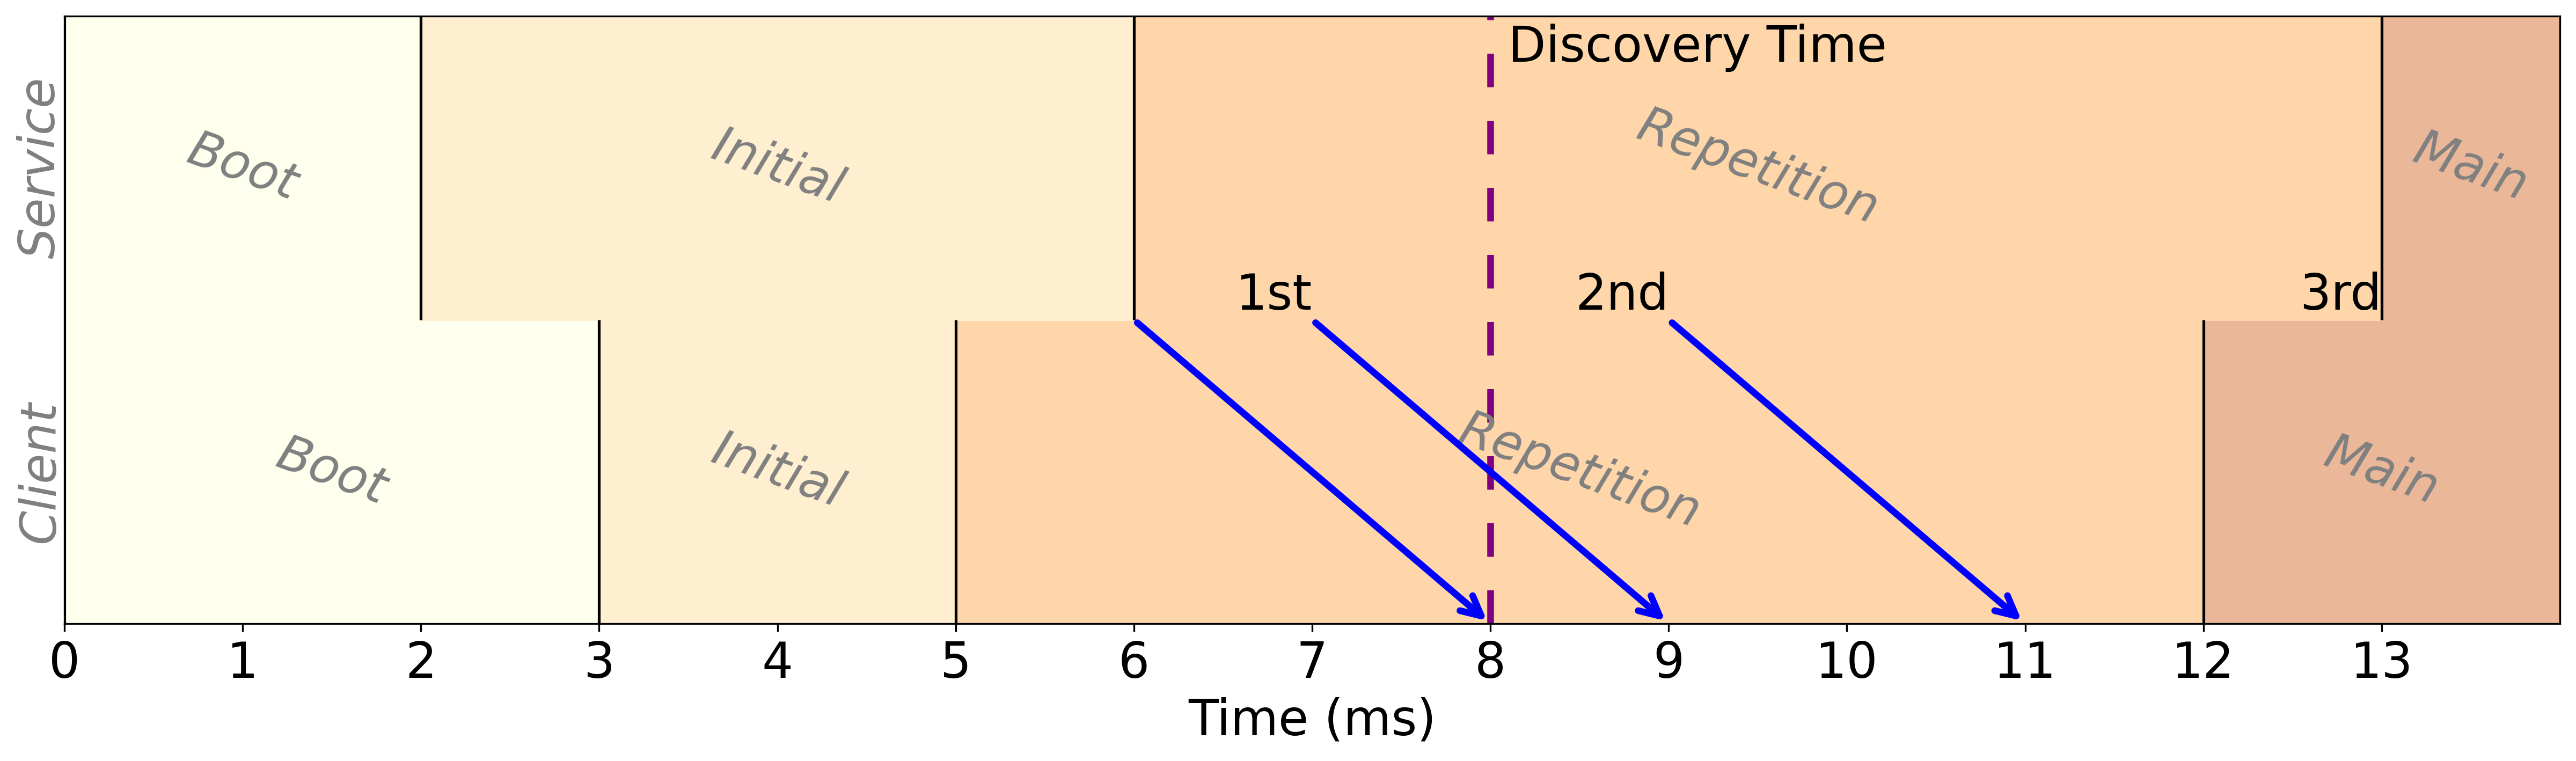

In [6]:
# Setup the plot.
[fig, ax] = plot_setup(entities, width=20, height=5, fontsize=22)
# Plot the phases.
plot_all_phases(ax, entities=entities, palette=light_palette)
# Plot service messages.
plot_rep_messages(ax, s, c, t_c, plot_first=True, stop_at_first=False, send_time=False, arrival_time=False, plot_answer=False, plot_index=True)
plot_cyc_messages(ax, s, c, t_c, plot_first=True, stop_at_first=False, send_time=False, arrival_time=False, plot_answer=False, plot_index=True)
plot_rep_messages(ax, c, s, t_c, plot_first=True, stop_at_first=False, send_time=False, arrival_time=False, plot_answer=True, plot_index=True)
# Plot the timing analysis result.
plot_t_w(t_w, color='purple', label="Discovery Time", ha="left", fontsize=22)